In [1]:
# Reference: https://github.com/facebookresearch/segment-anything/blob/main/notebooks/automatic_mask_generator_example.ipynb

In [2]:
import sys
import os.path

base_path = '/pt/sam/'

!{sys.executable} -m pip install opencv-python
#!{sys.executable} pip install 'git+https://github.com/facebookresearch/segment-anything.git'

if os.path.exists('/pt/sam/repo/README.md'):
    print('Segment Anything repo exists')
else:
    !git clone 'https://github.com/facebookresearch/segment-anything.git' '/pt/sam/repo/'
    print('Segment Anything repo downloaded')

if os.path.isfile(base_path + '/models/sam_vit_h_4b8939.pth'):
    print('Segment Anything checkpoint exists')
else:
    %cd /pt/sam/models
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
    print('Segment Anything checkpoint downloaded')

if os.path.isfile(base_path + '/images/input.jpg'):
    print('Test image exists')
else:
    !mkdir /pt/sam/images
    !wget -O images/input.jpg https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
    print('Test image downloaded')

%cd /pt/sam/

Segment Anything repo exists
Segment Anything checkpoint exists
Test image exists
/pt/sam


In [3]:
import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

import numpy as np
import cv2

sys.path.append("repo")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

PyTorch version: 2.7.1+cu126
Torchvision version: 0.22.1+cu126
CUDA is available: True


In [4]:
import matplotlib.pyplot as plt

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [5]:
image = cv2.imread('/pt/sam/images/input.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
sam_checkpoint = "models/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [7]:
masks = mask_generator.generate(image)

Total masks: 35, Mask 0: dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


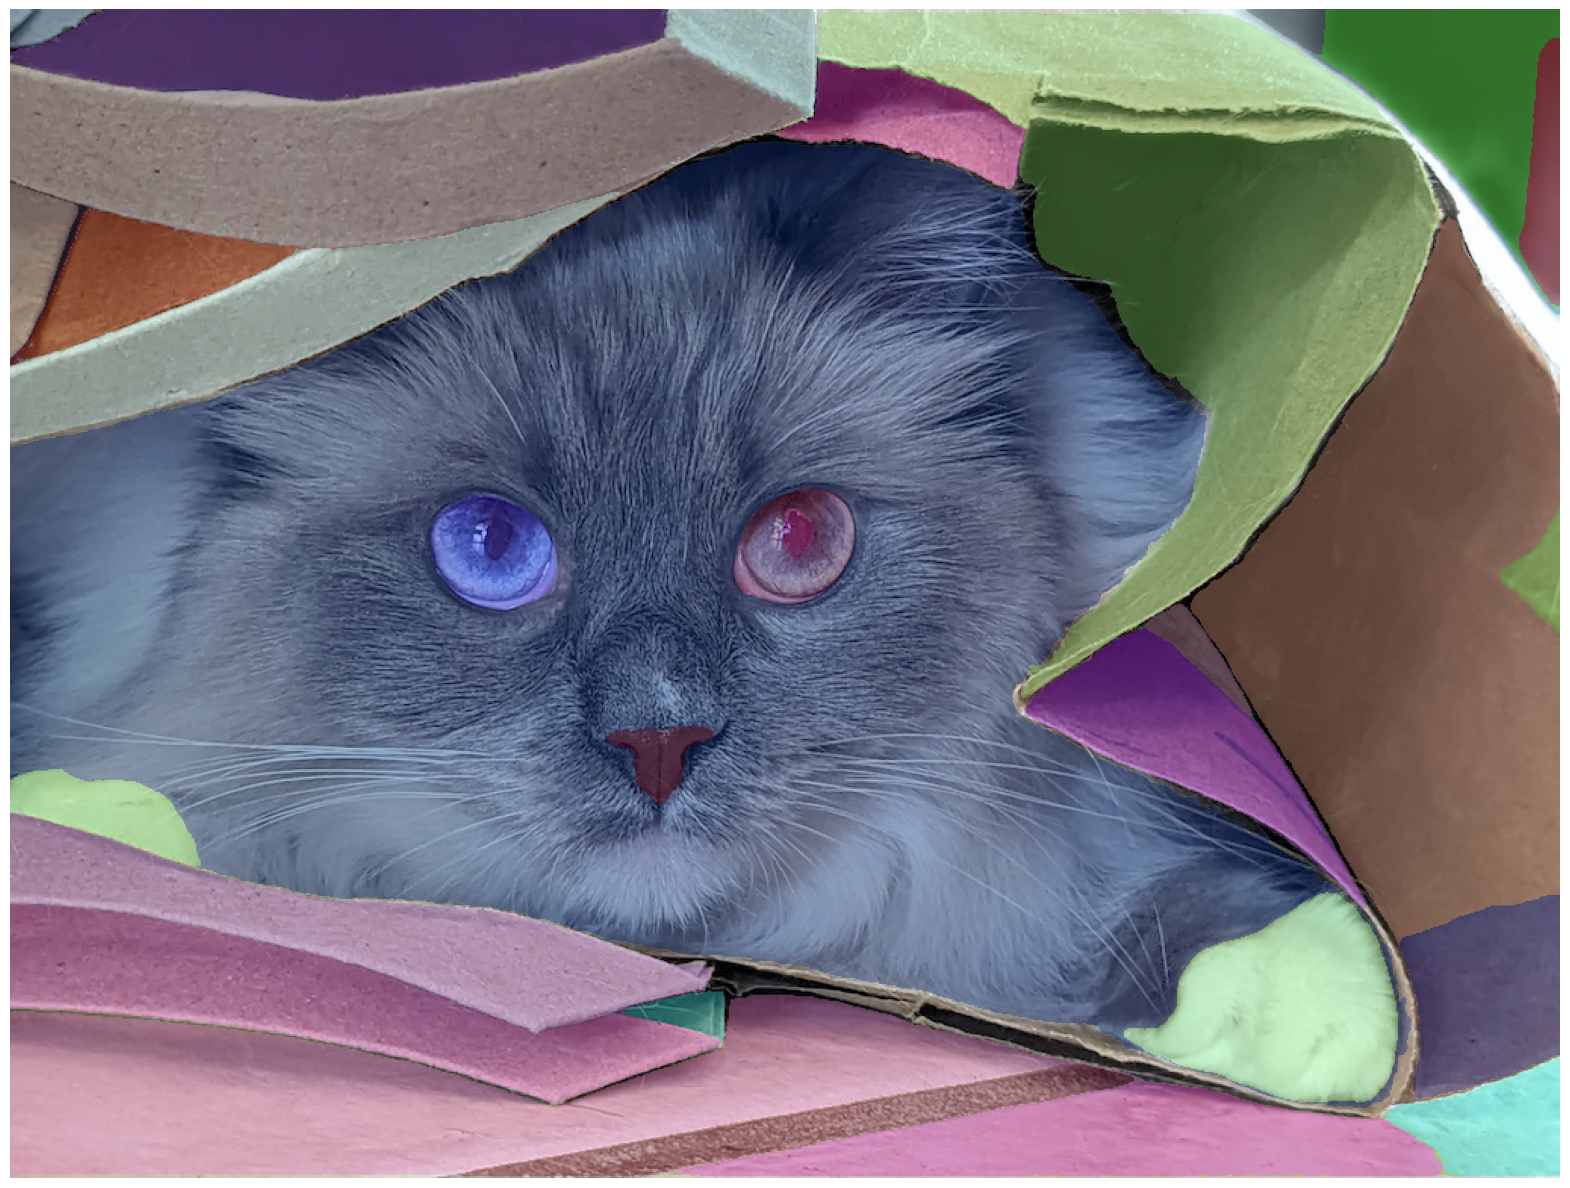

In [8]:
print(f'Total masks: {len(masks)}, Mask 0: {masks[0].keys()}')

plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
#plt.savefig('output.jpg', bbox_inches='tight')
plt.show()